In [1]:
import numpy as np
import pandas as pd
import requests
import time
import tweepy
import json
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_style('darkgrid')

## Gathering data

### 1. The WeRateDogs Twitter archive

In [2]:
# Reading the twitter-archive-enhanced.csv file
df_archive = pd.read_csv("twitter-archive-enhanced.csv")
df_archive.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


In [3]:
df_archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

### 2. The Tweet Image Predictions

In [4]:
# Getting a webpage stored in url
url = "https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv"
response = requests.get(url)

# Opening and saving the file selected after the last slash from the url => image-predictions.tsv
with open(url.split('/')[-1], mode = 'wb') as file:
        file.write(response.content)

In [5]:
# Reading Tab-separate files (TSV files) we should use sep = '\t'
df_image = pd.read_csv("image-predictions.tsv", sep = '\t')
df_image.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [6]:
df_image.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


### 3. The Twitter API

In [5]:
# Twitter API access
consumer_key = 'YOUR CONSUMER KEY'
consumer_secret = 'YOUR CONSUMER SECRET'
access_token = 'YOUR ACCESS TOKEN'
access_secret = 'YOUR ACCESS SECRET'

auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth)

In [6]:
# Downloading Tweepy objects defined by Tweet ID => df_archive.tweet_id
# Storing the list of tweets in data_list
data_list = []

# Storing the list of errors in error_list
error_list = []

# Recording the start time of execution
start = time.time()

# Adding each available tweet into to data_list
for tweet_id in df_archive["tweet_id"]:
    try:
        tweet = api.get_status(tweet_id, 
                               tweet_mode = "extended", 
                               wait_on_rate_limit = True, 
                               wait_on_rate_limit_notify = True)._json
        
        favorites = tweet["favorite_count"]
        retweets = tweet["retweet_count"]
        
        
        data_list.append({"tweet_id": int(tweet_id),
                        "favorites": int(favorites),
                        "retweets": int(retweets)})
        
    except Exception as e:
        error_list.append(tweet_id)
        
# Recording the end time of execution
end = time.time()
print(f"Time recorded in seconds: {end - start}")

Rate limit reached. Sleeping for: 129
Rate limit reached. Sleeping for: 146


Time recorded in seconds: 2271.9571866989136


In [7]:
print("The list of tweets found: " ,len(data_list))
print("The list of tweets not found: " , len(error_list))
t = 2271.9571866989136/60
print(f"Time recorded in minutes: {t}")

The list of tweets found:  2331
The list of tweets not found:  25
Time recorded in minutes: 37.86595311164856


In [9]:
# Creating the Dataframe from the data_list
json_data = pd.DataFrame(data_list, columns = ["tweet_id", 
                                               "favorites", 
                                               "retweets"])

# Saving the Dataframe in the file tweet_json.txt
json_data.to_csv("tweet_json.txt", encoding = "utf-8", index = False)

In [7]:
# Reading the tweet_json.txt file
df_tweet = pd.read_csv("tweet_json.txt", encoding = "utf-8")
df_tweet.head()

,tweet_id,favorites,retweets
0,892420643555336193,36600,7789
1,892177421306343426,31537,5771
2,891815181378084864,23757,3820
3,891689557279858688,39927,7960
4,891327558926688256,38124,8597


In [8]:
df_tweet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2331 entries, 0 to 2330
Data columns (total 3 columns):
tweet_id     2331 non-null int64
favorites    2331 non-null int64
retweets     2331 non-null int64
dtypes: int64(3)
memory usage: 54.8 KB


## Assessing data

In [9]:
df_archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [10]:
# Checking timestamp data type
type(df_archive["timestamp"][0])

str

In [11]:
df_archive

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2351,666049248165822465,NaN,NaN,2015-11-16 00:24:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a 1949 1st generation vulpix. Enj...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666049248...,5,10,None,None,None,None,None
2352,666044226329800704,NaN,NaN,2015-11-16 00:04:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a purebred Piers Morgan. Loves to Netf...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666044226...,6,10,a,None,None,None,None
2353,666033412701032449,NaN,NaN,2015-11-15 23:21:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a very happy pup. Big fan of well-main...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666033412...,9,10,a,None,None,None,None
2354,666029285002620928,NaN,NaN,2015-11-15 23:05:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a western brown Mitsubishi terrier. Up...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666029285...,7,10,a,None,None,None,None


In [12]:
# Looking for duplicates
sum(df_archive.duplicated(subset = "tweet_id"))

0

In [13]:
# Detect missing values
df_archive.isnull().sum()

tweet_id                         0
in_reply_to_status_id         2278
in_reply_to_user_id           2278
timestamp                        0
source                           0
text                             0
retweeted_status_id           2175
retweeted_status_user_id      2175
retweeted_status_timestamp    2175
expanded_urls                   59
rating_numerator                 0
rating_denominator               0
name                             0
doggo                            0
floofer                          0
pupper                           0
puppo                            0
dtype: int64

In [14]:
# Checking the rating_numerator
df_archive.rating_numerator.value_counts()

12      558
11      464
10      461
13      351
9       158
8       102
7        55
14       54
5        37
6        32
3        19
4        17
1         9
2         9
420       2
0         2
15        2
75        2
80        1
20        1
24        1
26        1
44        1
50        1
60        1
165       1
84        1
88        1
144       1
182       1
143       1
666       1
960       1
1776      1
17        1
27        1
45        1
99        1
121       1
204       1
Name: rating_numerator, dtype: int64

In [15]:
# Checking the rating_denominator
df_archive.rating_denominator.value_counts()

10     2333
11        3
50        3
80        2
20        2
2         1
16        1
40        1
70        1
15        1
90        1
110       1
120       1
130       1
150       1
170       1
7         1
0         1
Name: rating_denominator, dtype: int64

In [16]:
df_archive.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


In [17]:
# Looking for duplicates
df_archive[df_archive.duplicated(subset = ["tweet_id"], keep = False)]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo


-------------------------------

In [18]:
df_image.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [19]:
df_image

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
...,...,...,...,...,...,...,...,...,...,...,...,...
2070,891327558926688256,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True
2071,891689557279858688,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
2072,891815181378084864,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
2073,892177421306343426,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True


In [20]:
# Looking for duplicates
sum(df_image.jpg_url.duplicated())

66

In [21]:
df_image.jpg_url.value_counts()

https://pbs.twimg.com/media/CwiuEJmW8AAZnit.jpg                                            2
https://pbs.twimg.com/media/CVgdFjNWEAAxmbq.jpg                                            2
https://pbs.twimg.com/media/CcG07BYW0AErrC9.jpg                                            2
https://pbs.twimg.com/media/C3nygbBWQAAjwcW.jpg                                            2
https://pbs.twimg.com/media/CvyVxQRWEAAdSZS.jpg                                            2
                                                                                          ..
https://pbs.twimg.com/media/DBrlZk2UQAAfAkd.jpg                                            1
https://pbs.twimg.com/media/CaZBErSWEAEdXk_.jpg                                            1
https://pbs.twimg.com/media/C7FJpgVW4AIDzi6.jpg                                            1
https://pbs.twimg.com/media/DBaHi3YXgAE6knM.jpg                                            1
https://pbs.twimg.com/ext_tw_video_thumb/751456786360725504/pu/img/hWq

In [22]:
df_image[df_image.jpg_url == "https://pbs.twimg.com/media/CtVAvX-WIAAcGTf.jpg"]

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
1478,780601303617732608,https://pbs.twimg.com/media/CtVAvX-WIAAcGTf.jpg,1,Saint_Bernard,0.995143,True,Cardigan,0.003044,True,English_springer,0.00105,True
1736,821813639212650496,https://pbs.twimg.com/media/CtVAvX-WIAAcGTf.jpg,1,Saint_Bernard,0.995143,True,Cardigan,0.003044,True,English_springer,0.00105,True


----------------------------

In [23]:
df_tweet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2331 entries, 0 to 2330
Data columns (total 3 columns):
tweet_id     2331 non-null int64
favorites    2331 non-null int64
retweets     2331 non-null int64
dtypes: int64(3)
memory usage: 54.8 KB


In [24]:
df_tweet

,tweet_id,favorites,retweets
0,892420643555336193,36600,7789
1,892177421306343426,31537,5771
2,891815181378084864,23757,3820
3,891689557279858688,39927,7960
4,891327558926688256,38124,8597
...,...,...,...
2326,666049248165822465,99,41
2327,666044226329800704,274,133
2328,666033412701032449,114,41
2329,666029285002620928,121,43


### Quality
  #### df_archive
   - Missing data.Some columns refer to the reply (in_reply_to_status_id, in_reply_to_user_id) are incomplete and are not needed. These columns can be droped.
   - Missing data.Some columns refer to the retweet (retweeted_status_id, retweeted_status_user_id, retweeted_status_timestamp) are incomplete and are not needed. These columns can be droped.
   - Missing data. The expanded_urls column is incomplete and is not needed. This column can be droped.
   - Incorrect data type in timestamp. Should be datetime;
   - The numerator and denominator values must be refined.

  #### df_image
   - 2356 tweets in df_archive, but only 2075 tweets in df_image => 281 missing data
   - The  breeds of dogs names in p1, p2 and p3 columns are not standardized. All names should be lowercase
   - Join the p1, p2, p3 columns into a new one and p1_conf, p2_conf, p3_conf columns into another
   - Some tweets have the jpg_url duplicated

  #### df_tweet
   - 2356 tweets in df_archive, but only 2331 tweets in df_tweet => 25 missing data
   
### Tidness
  #### df_archive
   - doggo, floofer, pupper, puppo columns should be one column (one variable in four columns).

  #### df_archive, df_image and df_tweet should be merged

## Cleaning data

In [25]:
df_archive_clean = df_archive.copy()
df_image_clean = df_image.copy()
df_tweet_clean = df_tweet.copy()

#### Define
Missing data. Some columns refer to the reply tweet (in_reply_to_status_id, in_reply_to_user_id) that is not needed and can be dropped.

#### Code

In [26]:
# Dropping the in_reply_to_status_id, in_reply_to_user_id columns
# Note: axis=1 denotes that we are referring to a column, not a row
df_archive_clean = df_archive_clean.drop("in_reply_to_status_id", axis = 1)
df_archive_clean = df_archive_clean.drop("in_reply_to_user_id", axis = 1)

#### Test

In [27]:
df_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 15 columns):
tweet_id                      2356 non-null int64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(2), int64(3), object(10)
memory usage: 276.2+ KB


#### Define
Missing data. Some columns refer to the retweet (retweeted_status_id, retweeted_status_user_id, retweeted_status_timestamp) that is not needed and can be dropped.

#### Code

In [28]:
# Dropping the retweeted_status_id, retweeted_status_user_id, retweeted_status_timestamp columns
df_archive_clean = df_archive_clean.drop("retweeted_status_id", axis = 1)
df_archive_clean = df_archive_clean.drop("retweeted_status_user_id", axis = 1)
df_archive_clean = df_archive_clean.drop("retweeted_status_timestamp", axis = 1)

#### Test

In [29]:
df_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 12 columns):
tweet_id              2356 non-null int64
timestamp             2356 non-null object
source                2356 non-null object
text                  2356 non-null object
expanded_urls         2297 non-null object
rating_numerator      2356 non-null int64
rating_denominator    2356 non-null int64
name                  2356 non-null object
doggo                 2356 non-null object
floofer               2356 non-null object
pupper                2356 non-null object
puppo                 2356 non-null object
dtypes: int64(3), object(9)
memory usage: 221.0+ KB


#### Define
Missing data. The expanded_urls column is incomplete and is not needed.
The source column, in turn, will not be used.
These columns can be dropped.

In [30]:
# Dropping the expanded_urls column
# Note: axis=1 denotes that we are referring to a column, not a row
df_archive_clean = df_archive_clean.drop("expanded_urls", axis = 1)
df_archive_clean = df_archive_clean.drop("source", axis = 1)

#### Test

In [31]:
df_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 10 columns):
tweet_id              2356 non-null int64
timestamp             2356 non-null object
text                  2356 non-null object
rating_numerator      2356 non-null int64
rating_denominator    2356 non-null int64
name                  2356 non-null object
doggo                 2356 non-null object
floofer               2356 non-null object
pupper                2356 non-null object
puppo                 2356 non-null object
dtypes: int64(3), object(7)
memory usage: 184.2+ KB


#### Define
Incorrect data type in timestamp. Should be datetime.

In [32]:
type(df_archive_clean["timestamp"][0])

str

#### Code

In [33]:
df_archive_clean["timestamp"] = pd.to_datetime(df_archive_clean["timestamp"])

#### Test

In [34]:
type(df_archive_clean["timestamp"][0])

pandas._libs.tslibs.timestamps.Timestamp

In [35]:
df_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 10 columns):
tweet_id              2356 non-null int64
timestamp             2356 non-null datetime64[ns, UTC]
text                  2356 non-null object
rating_numerator      2356 non-null int64
rating_denominator    2356 non-null int64
name                  2356 non-null object
doggo                 2356 non-null object
floofer               2356 non-null object
pupper                2356 non-null object
puppo                 2356 non-null object
dtypes: datetime64[ns, UTC](1), int64(3), object(6)
memory usage: 184.2+ KB


#### Define
doggo, floofer, pupper, puppo columns should be one column (one variable in four columns). 
Let's replacing the None value for blank, concatenating all 4 columns to 1 column dog_stage, updating multiple dog_stages and dropping doggo, floofer, pupper, puppo columns.

#### Code

In [36]:
#  Replacing the None value for blank ''
df_archive_clean.doggo.replace("None", '', inplace = True)
df_archive_clean.floofer.replace("None", '', inplace = True)
df_archive_clean.pupper.replace("None", '', inplace = True)
df_archive_clean.puppo.replace("None", '', inplace = True)

In [38]:
# Concatenating all 4 columns to 1 column dog_stage
df_archive_clean['dog_stage'] = df_archive_clean['doggo'] + df_archive_clean['floofer'] + df_archive_clean['pupper'] + df_archive_clean['puppo']

In [40]:
df_archive_clean.dog_stage.value_counts()

                1976
pupper           245
doggo             83
puppo             29
doggopupper       12
floofer            9
doggofloofer       1
doggopuppo         1
Name: dog_stage, dtype: int64

In [41]:
#  Replacing multiple dog stages 
# doggopupper for doggo, pupper
# doggofloofer for doggo, floofer
# doggopuppo for doggo, puppo
df_archive_clean.dog_stage.replace("doggopupper", "doggo, pupper", inplace = True)
df_archive_clean.dog_stage.replace("doggofloofer", "doggo, floofer", inplace = True)
df_archive_clean.dog_stage.replace("doggopuppo", "doggo, puppo", inplace = True)

In [45]:
# Dropping the doggo, floofer, pupper, puppo columns
df_archive_clean = df_archive_clean.drop("doggo", 1)
df_archive_clean = df_archive_clean.drop("floofer", 1)
df_archive_clean = df_archive_clean.drop("pupper", 1)
df_archive_clean = df_archive_clean.drop("puppo", 1)

#### Test

In [46]:
df_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 7 columns):
tweet_id              2356 non-null int64
timestamp             2356 non-null datetime64[ns, UTC]
text                  2356 non-null object
rating_numerator      2356 non-null int64
rating_denominator    2356 non-null int64
name                  2356 non-null object
dog_stage             2356 non-null object
dtypes: datetime64[ns, UTC](1), int64(3), object(3)
memory usage: 129.0+ KB


In [47]:
df_archive_clean.dog_stage.value_counts()

                  1976
pupper             245
doggo               83
puppo               29
doggo, pupper       12
floofer              9
doggo, floofer       1
doggo, puppo         1
Name: dog_stage, dtype: int64

#### Define
The breeds of dogs names in p1, p2 and p3 columns are not standardized. All names should be lowercase

In [48]:
df_image_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [49]:
df_image_clean.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


#### Code

In [50]:
# Converting strings in p1, p2, p3 to lower case
df_image_clean["p1"] = df_image_clean["p1"].str.lower()
df_image_clean["p2"] = df_image_clean["p2"].str.lower()
df_image_clean["p3"] = df_image_clean["p3"].str.lower()

#### Test

In [51]:
df_image_clean.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,welsh_springer_spaniel,0.465074,True,collie,0.156665,True,shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,german_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,rottweiler,0.243682,True,doberman,0.154629,True


#### Define
Some tweets have the jpg_url duplicated in df_image_clean. Delete the duplicated tweets

In [52]:
sum(df_image_clean.jpg_url.duplicated())

66

#### Code

In [53]:
# Dropping the jpg_url duplicated, keeping the last one
df_image_clean = df_image_clean.drop_duplicates(subset = ["jpg_url"], keep = "last")

#### Test

In [54]:
sum(df_image_clean.jpg_url.duplicated())

0

In [55]:
df_image_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2009 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2009 non-null int64
jpg_url     2009 non-null object
img_num     2009 non-null int64
p1          2009 non-null object
p1_conf     2009 non-null float64
p1_dog      2009 non-null bool
p2          2009 non-null object
p2_conf     2009 non-null float64
p2_dog      2009 non-null bool
p3          2009 non-null object
p3_conf     2009 non-null float64
p3_dog      2009 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 162.8+ KB


#### Define
Join the p1, p2, p3 columns into a new one and p1_conf, p2_conf, p3_conf columns into another.

#### Image Predictions File
How was said in Project Motivation, p1 is the algorithm's #1 prediction for the image in the tweet, p1_conf is how confident the algorithm is in its #1 prediction, p1_dog is whether or not the #1 prediction is a breed of dog. p1_conf is always higher than p2_conf that in turn is higher than p3_conf. p1 could not find a dog in a picture (p1_dog  = False), but p2 can find it (p2_dog  = True), gaining relevance in the predictive process.

In [56]:
df_image_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2009 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2009 non-null int64
jpg_url     2009 non-null object
img_num     2009 non-null int64
p1          2009 non-null object
p1_conf     2009 non-null float64
p1_dog      2009 non-null bool
p2          2009 non-null object
p2_conf     2009 non-null float64
p2_dog      2009 non-null bool
p3          2009 non-null object
p3_conf     2009 non-null float64
p3_dog      2009 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 162.8+ KB


In [57]:
df_image_clean[["tweet_id", "p1", "p1_conf", "p1_dog", "p2", "p2_conf", "p2_dog", "p3", "p3_conf", "p3_dog"]].head(20)

,tweet_id,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,welsh_springer_spaniel,0.465074,True,collie,0.156665,True,shetland_sheepdog,0.061428,True
1,666029285002620928,redbone,0.506826,True,miniature_pinscher,0.074192,True,rhodesian_ridgeback,0.072010,True
2,666033412701032449,german_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,miniature_pinscher,0.560311,True,rottweiler,0.243682,True,doberman,0.154629,True
5,666050758794694657,bernese_mountain_dog,0.651137,True,english_springer,0.263788,True,greater_swiss_mountain_dog,0.016199,True
6,666051853826850816,box_turtle,0.933012,False,mud_turtle,0.045885,False,terrapin,0.017885,False
7,666055525042405380,chow,0.692517,True,tibetan_mastiff,0.058279,True,fur_coat,0.054449,False
8,666057090499244032,shopping_cart,0.962465,False,shopping_basket,0.014594,False,golden_retriever,0.007959,True
9,666058600524156928,miniature_poodle,0.201493,True,komondor,0.192305,True,soft-coated_wheaten_terrier,0.082086,True


#### Code

In [58]:
# Storing the prediction p1 or p2 or p3 the one with the higher confidence level who managed to identify a dog (p1_dog = True)
# Storing the confidence level p1_conf or p2_conf or p3_conf.
prediction = []
confidence = []

def prediction_summarize(df):
    if df["p1_dog"] == True:
        prediction.append(df["p1"])
        confidence.append(df["p1_conf"])
    
    elif df["p2_dog"] == True:
        prediction.append(df["p2"])
        confidence.append(df["p2_conf"])
    
    elif df["p3_dog"] == True:
        prediction.append(df["p3"])
        confidence.append(df["p3_conf"])
    
    else:
        prediction.append("unidentifiable")
        confidence.append(0)

# Applying a function along an axis of the DataFrame
df_image_clean.apply(prediction_summarize, axis = 1)


# Creating two new columns in df_image_clean
df_image_clean["prediction"] = prediction
df_image_clean["confidence"] = confidence

In [59]:
df_image_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2009 entries, 0 to 2074
Data columns (total 14 columns):
tweet_id      2009 non-null int64
jpg_url       2009 non-null object
img_num       2009 non-null int64
p1            2009 non-null object
p1_conf       2009 non-null float64
p1_dog        2009 non-null bool
p2            2009 non-null object
p2_conf       2009 non-null float64
p2_dog        2009 non-null bool
p3            2009 non-null object
p3_conf       2009 non-null float64
p3_dog        2009 non-null bool
prediction    2009 non-null object
confidence    2009 non-null float64
dtypes: bool(3), float64(4), int64(2), object(5)
memory usage: 194.2+ KB


In [60]:
# Dropping the p1, p2, p3, p1_conf, p2_conf, p3_conf, p1_dog, p2_dog, p3_dog columns
df_image_clean = df_image_clean.drop(["p1", "p2", "p3", 
                                      "p1_conf", "p2_conf", "p3_conf", 
                                      "p1_dog", "p2_dog", "p3_dog"], 1)

#### Test

In [61]:
df_image_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2009 entries, 0 to 2074
Data columns (total 5 columns):
tweet_id      2009 non-null int64
jpg_url       2009 non-null object
img_num       2009 non-null int64
prediction    2009 non-null object
confidence    2009 non-null float64
dtypes: float64(1), int64(2), object(2)
memory usage: 94.2+ KB


In [62]:
df_image_clean.head(20)

,tweet_id,jpg_url,img_num,prediction,confidence
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,welsh_springer_spaniel,0.465074
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,german_shepherd,0.596461
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,rhodesian_ridgeback,0.408143
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311
5,666050758794694657,https://pbs.twimg.com/media/CT5Jof1WUAEuVxN.jpg,1,bernese_mountain_dog,0.651137
6,666051853826850816,https://pbs.twimg.com/media/CT5KoJ1WoAAJash.jpg,1,unidentifiable,0.000000
7,666055525042405380,https://pbs.twimg.com/media/CT5N9tpXIAAifs1.jpg,1,chow,0.692517
8,666057090499244032,https://pbs.twimg.com/media/CT5PY90WoAAQGLo.jpg,1,golden_retriever,0.007959
9,666058600524156928,https://pbs.twimg.com/media/CT5Qw94XAAA_2dP.jpg,1,miniature_poodle,0.201493


In [63]:
df_image_clean.prediction.value_counts()

unidentifiable          318
golden_retriever        158
labrador_retriever      108
pembroke                 95
chihuahua                91
                       ... 
standard_schnauzer        1
clumber                   1
scotch_terrier            1
bouvier_des_flandres      1
silky_terrier             1
Name: prediction, Length: 114, dtype: int64

#### Define:
The numerator and denominator values must be refined.
Following what was instructed in Project Motivation, the numerator and the denominator are not 100% correct and need to be revised.

#### Decimal Numbers

#### Code

In [68]:
# Increasing the width of the text column to be able to read the entire tweet
# Using regular expression, we can identify all the numerators that are decimal numbers
with pd.option_context("max_colwidth", 200):
    display(df_archive_clean[["tweet_id", "text", "rating_numerator", "rating_denominator"]]
            [df_archive_clean["text"].str.contains(r"([0-9]+[0-9.]*\/[0-9]+[0-9]*)")])

,tweet_id,text,rating_numerator,rating_denominator
0,892420643555336193,This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,13.0,10.0
1,892177421306343426,"This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",13.0,10.0
2,891815181378084864,This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB,12.0,10.0
3,891689557279858688,This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ,13.0,10.0
4,891327558926688256,"This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https://t.co/AtUZn91f7f",12.0,10.0
...,...,...,...,...
2351,666049248165822465,Here we have a 1949 1st generation vulpix. Enjoys sweat tea and Fox News. Cannot be phased. 5/10 https://t.co/4B7cOc1EDq,5.0,10.0
2352,666044226329800704,This is a purebred Piers Morgan. Loves to Netflix and chill. Always looks like he forgot to unplug the iron. 6/10 https://t.co/DWnyCjf2mx,6.0,10.0
2353,666033412701032449,Here is a very happy pup. Big fan of well-maintained decks. Just look at that tongue. 9/10 would cuddle af https://t.co/y671yMhoiR,9.0,10.0
2354,666029285002620928,This is a western brown Mitsubishi terrier. Upset about leaf. Actually 2 dogs here. 7/10 would walk the shit out of https://t.co/r7mOb2m0UI,7.0,10.0


In [81]:
# As we found decimal numbers in numerators let's change the data type in rating_numerator and rating_denominator to float
df_archive_clean["rating_numerator"] = df_archive_clean["rating_numerator"].astype(float)
df_archive_clean["rating_denominator"] = df_archive_clean["rating_denominator"].astype(float)
df_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 8 columns):
tweet_id              2356 non-null int64
timestamp             2356 non-null datetime64[ns, UTC]
text                  2356 non-null object
rating_numerator      2356 non-null float64
rating_denominator    2356 non-null float64
name                  2356 non-null object
dog_stage             2356 non-null object
rating                2356 non-null object
dtypes: datetime64[ns, UTC](1), float64(2), int64(1), object(4)
memory usage: 147.4+ KB


In [82]:
# Using regular expression, we can extract the rating from text and store in a new column rating
df_archive_clean["rating"] = df_archive_clean.text.str.extract('([0-9]+[0-9.]*\/[0-9]+[0-9]*)', expand = True)

In [84]:
# Splitting the ranting column in two columns as a float number
df_archive_clean[["rating_numerator", "rating_denominator"]] = df_archive_clean["rating"].str.split('/',expand = True).astype(float)

In [86]:
# Dropping the rating column
df_archive_clean = df_archive_clean.drop("rating", 1)

#### Test

In [87]:
df_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 7 columns):
tweet_id              2356 non-null int64
timestamp             2356 non-null datetime64[ns, UTC]
text                  2356 non-null object
rating_numerator      2356 non-null float64
rating_denominator    2356 non-null float64
name                  2356 non-null object
dog_stage             2356 non-null object
dtypes: datetime64[ns, UTC](1), float64(2), int64(1), object(3)
memory usage: 129.0+ KB


In [88]:
# Increasing the width of the text column to be able to read the entire tweet
# Using regular expression, we can identify all the numerators that are decimal numbers
with pd.option_context("max_colwidth", 200):
    display(df_archive_clean[["tweet_id", "text", "rating_numerator", "rating_denominator"]]
            [df_archive_clean["text"].str.contains(r"([0-9]+[0-9.]*\/[0-9]+[0-9]*)")])

,tweet_id,text,rating_numerator,rating_denominator
0,892420643555336193,This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,13.0,10.0
1,892177421306343426,"This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",13.0,10.0
2,891815181378084864,This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB,12.0,10.0
3,891689557279858688,This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ,13.0,10.0
4,891327558926688256,"This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https://t.co/AtUZn91f7f",12.0,10.0
...,...,...,...,...
2351,666049248165822465,Here we have a 1949 1st generation vulpix. Enjoys sweat tea and Fox News. Cannot be phased. 5/10 https://t.co/4B7cOc1EDq,5.0,10.0
2352,666044226329800704,This is a purebred Piers Morgan. Loves to Netflix and chill. Always looks like he forgot to unplug the iron. 6/10 https://t.co/DWnyCjf2mx,6.0,10.0
2353,666033412701032449,Here is a very happy pup. Big fan of well-maintained decks. Just look at that tongue. 9/10 would cuddle af https://t.co/y671yMhoiR,9.0,10.0
2354,666029285002620928,This is a western brown Mitsubishi terrier. Upset about leaf. Actually 2 dogs here. 7/10 would walk the shit out of https://t.co/r7mOb2m0UI,7.0,10.0


#### Denominator different than 10.0

#### Code

In [89]:
# Searching for denominator different than 10.0
rating_to_fix = df_archive_clean.query('rating_denominator != 10.0')

In [90]:
# Increasing the width of the text column to be able to read the entire tweet
with pd.option_context("max_colwidth", 200):
    display(rating_to_fix[["tweet_id", "text", "rating_numerator", "rating_denominator"]])

,tweet_id,text,rating_numerator,rating_denominator
313,835246439529840640,"@jonnysun @Lin_Manuel ok jomny I know you're excited but 960/00 isn't a valid rating, 13/10 is tho",960.0,0.0
342,832088576586297345,@docmisterio account started on 11/15/15,11.0,15.0
433,820690176645140481,The floofs have been released I repeat the floofs have been released. 84/70 https://t.co/NIYC820tmd,84.0,70.0
516,810984652412424192,Meet Sam. She smiles 24/7 &amp; secretly aspires to be a reindeer. \nKeep Sam smiling by clicking and sharing this link:\nhttps://t.co/98tB8y7y7t https://t.co/LouL5vdvxx,24.0,7.0
784,775096608509886464,"RT @dog_rates: After so many requests, this is Bretagne. She was the last surviving 9/11 search dog, and our second ever 14/10. RIP https:/…",9.0,11.0
902,758467244762497024,Why does this never happen at my front door... 165/150 https://t.co/HmwrdfEfUE,165.0,150.0
1068,740373189193256964,"After so many requests, this is Bretagne. She was the last surviving 9/11 search dog, and our second ever 14/10. RIP https://t.co/XAVDNDaVgQ",9.0,11.0
1120,731156023742988288,Say hello to this unbelievably well behaved squad of doggos. 204/170 would try to pet all at once https://t.co/yGQI3He3xv,204.0,170.0
1165,722974582966214656,Happy 4/20 from the squad! 13/10 for all https://t.co/eV1diwds8a,4.0,20.0
1202,716439118184652801,This is Bluebert. He just saw that both #FinalFur match ups are split 50/50. Amazed af. 11/10 https://t.co/Kky1DPG4iq,50.0,50.0


In [91]:
# Let's correct the denumerator and the numerator too
df_archive_clean.loc[(df_archive_clean.tweet_id == 666287406224695296),"rating_denominator"] = 10.0
df_archive_clean.loc[(df_archive_clean.tweet_id == 666287406224695296),"rating_numerator"] = 9.0

df_archive_clean.loc[(df_archive_clean.tweet_id == 722974582966214656),"rating_denominator"] = 10.0
df_archive_clean.loc[(df_archive_clean.tweet_id == 722974582966214656),"rating_numerator"] = 13.0

df_archive_clean.loc[(df_archive_clean.tweet_id == 716439118184652801),"rating_denominator"] = 10.0
df_archive_clean.loc[(df_archive_clean.tweet_id == 716439118184652801),"rating_numerator"] = 11.0

df_archive_clean.loc[(df_archive_clean.tweet_id == 740373189193256964),"rating_denominator"] = 10.0
df_archive_clean.loc[(df_archive_clean.tweet_id == 740373189193256964),"rating_numerator"] = 14.0

df_archive_clean.loc[(df_archive_clean.tweet_id == 682962037429899265),"rating_denominator"] = 10.0
df_archive_clean.loc[(df_archive_clean.tweet_id == 682962037429899265),"rating_numerator"] = 10.0

df_archive_clean.loc[(df_archive_clean.tweet_id == 835246439529840640),"rating_denominator"] = 10.0
df_archive_clean.loc[(df_archive_clean.tweet_id == 835246439529840640),"rating_numerator"] = 13.0

In [92]:
# Deleting the tweets without a rate
df_archive_clean = df_archive_clean[df_archive_clean.tweet_id != 832088576586297345]
df_archive_clean = df_archive_clean[df_archive_clean.tweet_id != 810984652412424192]


#### Test

In [93]:
df_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2354 entries, 0 to 2355
Data columns (total 7 columns):
tweet_id              2354 non-null int64
timestamp             2354 non-null datetime64[ns, UTC]
text                  2354 non-null object
rating_numerator      2354 non-null float64
rating_denominator    2354 non-null float64
name                  2354 non-null object
dog_stage             2354 non-null object
dtypes: datetime64[ns, UTC](1), float64(2), int64(1), object(3)
memory usage: 147.1+ KB


In [94]:
# Increasing the width of the text column to be able to read the entire tweet
# Using regular expression, we can identify all tweets that have Bretagne in text
with pd.option_context("max_colwidth", 200):
    display(df_archive_clean[["tweet_id", "text", "rating_numerator", "rating_denominator"]]
            [df_archive_clean["text"].str.contains(r"(Bretagne.)")])

,tweet_id,text,rating_numerator,rating_denominator
784,775096608509886464,"RT @dog_rates: After so many requests, this is Bretagne. She was the last surviving 9/11 search dog, and our second ever 14/10. RIP https:/…",9.0,11.0
1068,740373189193256964,"After so many requests, this is Bretagne. She was the last surviving 9/11 search dog, and our second ever 14/10. RIP https://t.co/XAVDNDaVgQ",14.0,10.0


 - 740373189193256964 => original tweet
 - 775096608509886464 => RT

#### Define:
We can see that when a tweet is actually a Retweet (RT), it starts the sentence with RT. Following the Project Details we don't want analyse RTs. Let's find all RTs and delete them.

#### Code

In [95]:
# Increasing the width of the text column to be able to read the entire tweet
# Using regular expression, we can identify all the tweets that have "RT" in text
with pd.option_context("max_colwidth", 200):
    display(df_archive_clean[["tweet_id", "text", "rating_numerator", "rating_denominator"]]
            [df_archive_clean["text"].str.contains(r"(RT\s)")])

,tweet_id,text,rating_numerator,rating_denominator
19,888202515573088257,RT @dog_rates: This is Canela. She attempted some fancy porch pics. They were unsuccessful. 13/10 someone help her https://t.co/cLyzpcUcMX,13.0,10.0
32,886054160059072513,RT @Athletics: 12/10 #BATP https://t.co/WxwJmvjfxo,12.0,10.0
36,885311592912609280,RT @dog_rates: This is Lilly. She just parallel barked. Kindly requests a reward now. 13/10 would pet so well https://t.co/SATN4If5H5,13.0,10.0
68,879130579576475649,RT @dog_rates: This is Emmy. She was adopted today. Massive round of pupplause for Emmy and her new family. 14/10 for all involved https://…,14.0,10.0
73,878404777348136964,"RT @dog_rates: Meet Shadow. In an attempt to reach maximum zooming borkdrive, he tore his ACL. Still 13/10 tho. Help him out below\n\nhttps:/…",13.0,10.0
...,...,...,...,...
1650,683515932363329536,HEY PUP WHAT'S THE PART OF THE HUMAN BODY THAT CONNECTS THE FOOT AND THE LEG? 11/10 so smart https://t.co/XQ1tRUmO3z,11.0,10.0
1860,675489971617296384,RT until we find this dog. Clearly a cool dog (front leg relaxed out window). Looks to be a superb driver. 10/10 https://t.co/MnTrKaQ8Wn,10.0,10.0
1991,672622327801233409,This lil pupper is sad because we haven't found Kony yet. RT to spread awareness. 12/10 would pet firmly https://t.co/Cv7dRdcMvQ,12.0,10.0
2259,667550904950915073,"RT @dogratingrating: Exceptional talent. Original humor. Cutting edge, Nova Scotian comedian. 12/10 https://t.co/uarnTjBeVA",12.0,10.0


In [96]:
# Deleting the RTs found
df_archive_clean = df_archive_clean[~df_archive_clean.text.str.contains(r"(RT\s)")]

#### Test

In [97]:
df_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2169 entries, 0 to 2355
Data columns (total 7 columns):
tweet_id              2169 non-null int64
timestamp             2169 non-null datetime64[ns, UTC]
text                  2169 non-null object
rating_numerator      2169 non-null float64
rating_denominator    2169 non-null float64
name                  2169 non-null object
dog_stage             2169 non-null object
dtypes: datetime64[ns, UTC](1), float64(2), int64(1), object(3)
memory usage: 135.6+ KB


In [98]:
# Increasing the width of the text column to be able to read the entire tweet
# Using regular expression, we can identify all the tweets that have "RT" in text
with pd.option_context("max_colwidth", 200):
    display(df_archive_clean[["tweet_id", "text", "rating_numerator", "rating_denominator"]]
            [df_archive_clean["text"].str.contains(r"(RT\s)")])

,tweet_id,text,rating_numerator,rating_denominator


#### Important
Numerators and denominators were extracted from the text column, revealing a unique complexity, as we do not know the data pattern used in rating. There may not even be a data pattern. 
Trying to find a data pattern, we found others problems in the process that have also been corrected, in order to improve the quality of the data.

#### Define:
df_archive, df_image and df_tweet should be merged

In [99]:
df_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2169 entries, 0 to 2355
Data columns (total 7 columns):
tweet_id              2169 non-null int64
timestamp             2169 non-null datetime64[ns, UTC]
text                  2169 non-null object
rating_numerator      2169 non-null float64
rating_denominator    2169 non-null float64
name                  2169 non-null object
dog_stage             2169 non-null object
dtypes: datetime64[ns, UTC](1), float64(2), int64(1), object(3)
memory usage: 135.6+ KB


In [100]:
df_image_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2009 entries, 0 to 2074
Data columns (total 5 columns):
tweet_id      2009 non-null int64
jpg_url       2009 non-null object
img_num       2009 non-null int64
prediction    2009 non-null object
confidence    2009 non-null float64
dtypes: float64(1), int64(2), object(2)
memory usage: 94.2+ KB


In [101]:
df_tweet_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2331 entries, 0 to 2330
Data columns (total 3 columns):
tweet_id     2331 non-null int64
favorites    2331 non-null int64
retweets     2331 non-null int64
dtypes: int64(3)
memory usage: 54.8 KB


#### Code

In [102]:
df_twitter = pd.merge(left = df_archive_clean, 
                      right = df_tweet_clean, 
                      left_on = "tweet_id", 
                      right_on = "tweet_id", how = "inner")

In [103]:
df_twitter = df_twitter.merge(df_image_clean, on = "tweet_id", how = "inner")

In [104]:
df_twitter.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1919 entries, 0 to 1918
Data columns (total 13 columns):
tweet_id              1919 non-null int64
timestamp             1919 non-null datetime64[ns, UTC]
text                  1919 non-null object
rating_numerator      1919 non-null float64
rating_denominator    1919 non-null float64
name                  1919 non-null object
dog_stage             1919 non-null object
favorites             1919 non-null int64
retweets              1919 non-null int64
jpg_url               1919 non-null object
img_num               1919 non-null int64
prediction            1919 non-null object
confidence            1919 non-null float64
dtypes: datetime64[ns, UTC](1), float64(3), int64(4), object(5)
memory usage: 209.9+ KB


## Storing data

In [105]:
# Storing the final dataframe df_twitter as a comma-separated values (csv) file named twitter_archive_master.csv
df_twitter.to_csv("twitter_archive_master.csv", index = False, encoding = "utf-8")

## Analyzing and Visualizing data

In [106]:
df_twitter.prediction.value_counts()

unidentifiable          302
golden_retriever        141
labrador_retriever      101
pembroke                 94
chihuahua                87
                       ... 
scotch_terrier            1
japanese_spaniel          1
silky_terrier             1
clumber                   1
bouvier_des_flandres      1
Name: prediction, Length: 114, dtype: int64

In [107]:
# Counting in prediction column for the most popular dog breed
# Let's slicing in order to get the top 20 dogs breeds and to not consider those unidentifiable
df_dog = df_twitter.prediction.value_counts()[1:21]
df_dog

golden_retriever             141
labrador_retriever           101
pembroke                      94
chihuahua                     87
pug                           60
toy_poodle                    49
chow                          45
pomeranian                    42
samoyed                       37
malamute                      32
chesapeake_bay_retriever      31
french_bulldog                29
cocker_spaniel                26
miniature_pinscher            24
eskimo_dog                    22
german_shepherd               21
staffordshire_bullterrier     20
shih-tzu                      20
siberian_husky                20
maltese_dog                   19
Name: prediction, dtype: int64

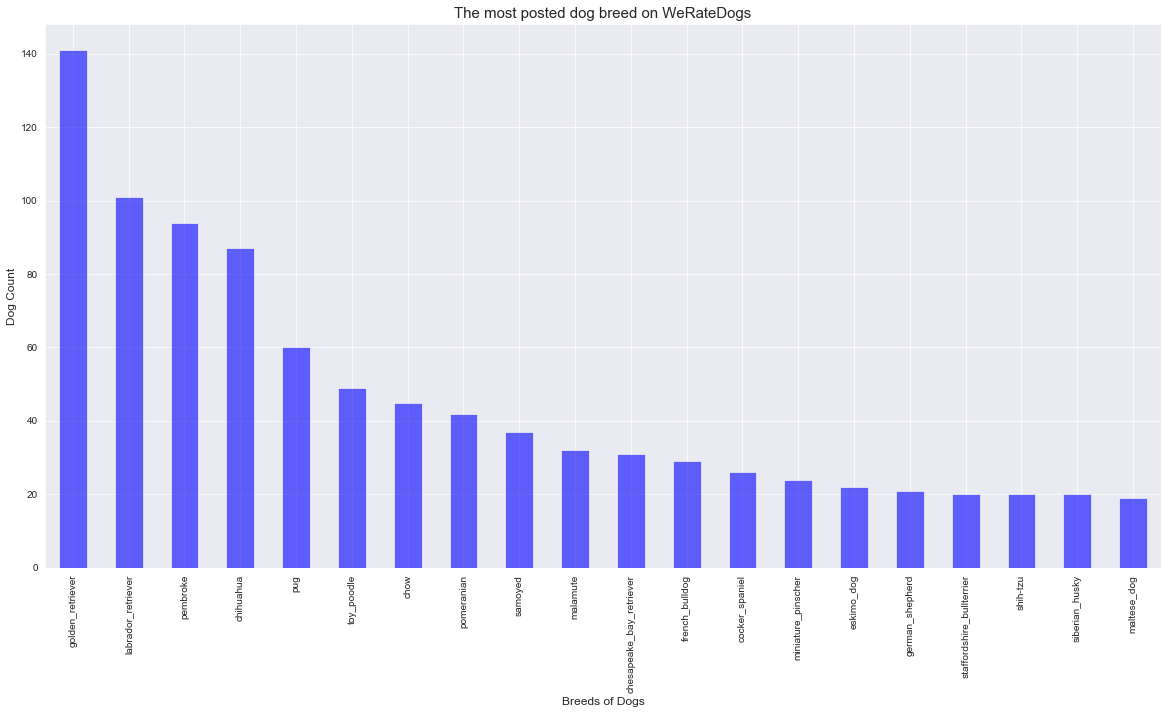

In [108]:
# Setting up the figure
plt.figure(figsize = (20,10))
sns.set_color_codes("dark")

# Plotting
df_dog.plot.bar(color = "blue", alpha = 0.6)

# Setting up the title and axes label
plt.title("The most posted dog breed on WeRateDogs", fontsize = 15)
plt.xlabel("Breeds of Dogs", fontsize = 12)
plt.ylabel("Dog Count", fontsize = 12);
plt.savefig("most_posted.png", dpi = 400)

### Insight
Golden retriever is the most posted dog breed on WeRateDog.
Followed by labrador retriever, pembroke, chihuahua, pug, etc.

In [182]:
# Copying and sorting by favorites
df_favorites = df_twitter.copy()
df_favorites.sort_values(by = "favorites", ascending = False, inplace = True)
df_favorites = df_favorites[:20]
df_favorites[["favorites", "prediction", "tweet_id"]].head()

,favorites,prediction,tweet_id
727,158154,labrador_retriever,744234799360020481
301,134811,lakeland_terrier,822872901745569793
105,117666,french_bulldog,866450705531457537
759,116821,eskimo_dog,739238157791694849
57,100328,english_springer,879415818425184262


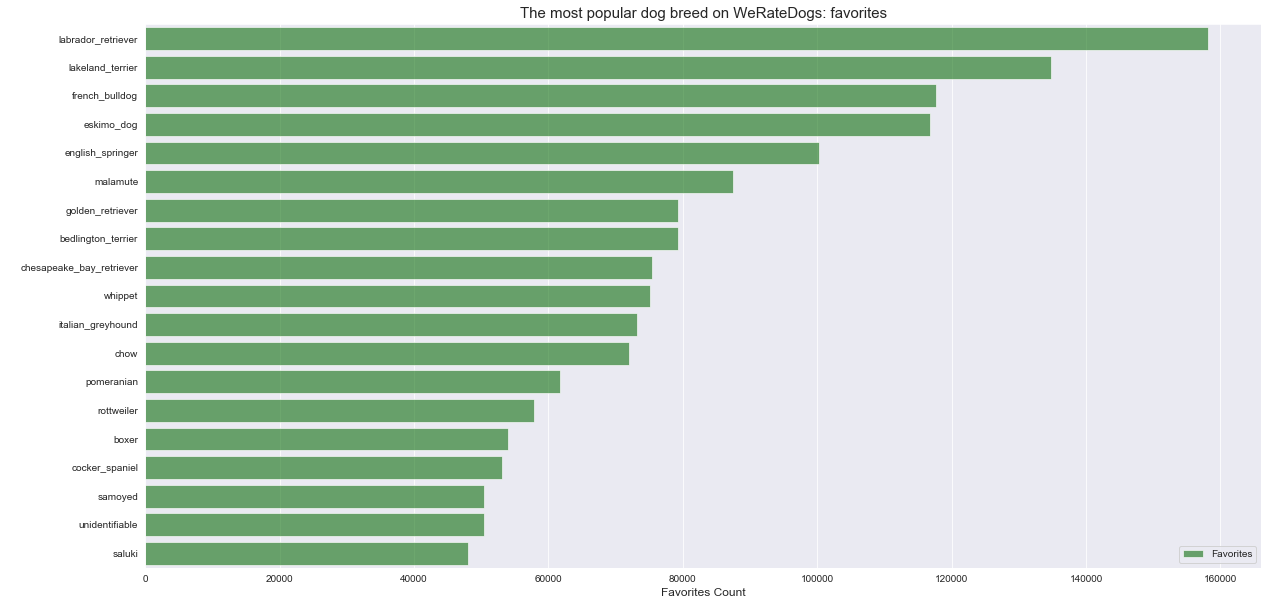

In [183]:
# Setting up the figure
plt.figure(figsize = (20,10))
sns.set_color_codes("dark")

# Plotting
sns.barplot(x = "favorites", y = "prediction", data = df_favorites, color = "green", label = "Favorites", alpha = 0.6, ci = None, estimator = max)

# Setting up the title and axes label
plt.title("The most popular dog breed on WeRateDogs: favorites", fontsize = 15)
plt.xlabel("Favorites Count", fontsize = 12)
plt.ylabel(" ")
plt.legend();
plt.savefig("favorites.png", dpi = 400)

### Insight
When we search for the tweet that has the largest number of favorites, we find one with a photo of a labrador retriever that has more than 158,000 favs. The labrador retriever is WeRateDogs' most popular dog breed in counting the number of favorites. The list goes on with lakeland terrier (134,811 favs), french bulldog (117,666 favs), eskimo dog (116,821 favs), english springer (100,328 favs), etc.

In [186]:
# Copying and sorting by retweets
df_retweets = df_twitter.copy()
df_retweets.sort_values(by = "retweets", ascending = False, inplace = True)
df_retweets = df_retweets[:20]
df_retweets[["retweets", "prediction", "tweet_id"]].head()

,retweets,prediction,tweet_id
727,78786,labrador_retriever,744234799360020481
759,58422,eskimo_dog,739238157791694849
301,44412,lakeland_terrier,822872901745569793
57,41068,english_springer,879415818425184262
105,33352,french_bulldog,866450705531457537


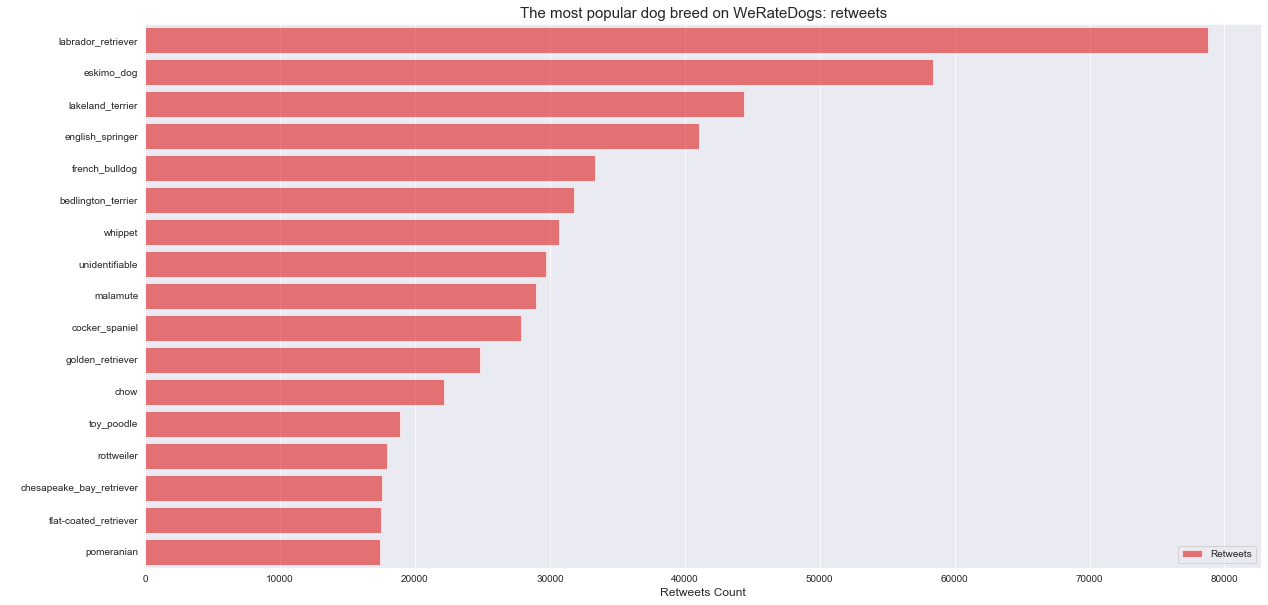

In [187]:
# Setting up the figure
plt.figure(figsize = (20,10))
sns.set_color_codes("dark")

# Plotting
sns.barplot(x = "retweets", y = "prediction", data = df_retweets, color = "red", label = "Retweets", alpha = 0.6, ci = None, estimator = max)

# Setting up the title and axes label
plt.title("The most popular dog breed on WeRateDogs: retweets", fontsize = 15)
plt.xlabel("Retweets Count", fontsize = 12)
plt.ylabel(" ")
plt.legend();
plt.savefig("retweets.png", dpi = 400)

### Insight
When we consider the number of retweets, we arrive at a tweet of a labrador retriever with 78,786 RTs.
The labrador retriever is not only the most popular breed of dog in WeRateDogs when counting favorites, it is also the most popular in the number of retweets. The same tweet (744234799360020481) received the highest number of favs and highest number of RTs. Followed by eskimo dog (58,422 RTs), lakeland terrier (44,412 RTs), english springer (41,068 RTs), french bulldog (33,352 RTs), etc.

In [174]:
# Copying and sorting by rating_numerator
df_ratings = df_twitter.copy()
df_ratings.sort_values(by = "rating_numerator", ascending = False, inplace = True)
df_ratings = df_ratings[3:23]
df_ratings[["rating_numerator", "prediction","img_num", "tweet_id"]].head()

,rating_numerator,prediction,img_num,tweet_id
616,165.0,labrador_retriever,1,758467244762497024
1370,144.0,chow,1,677716515794329600
1241,143.0,golden_retriever,2,684225744407494656
1242,121.0,soft-coated_wheaten_terrier,1,684222868335505415
892,99.0,golden_retriever,1,713900603437621249


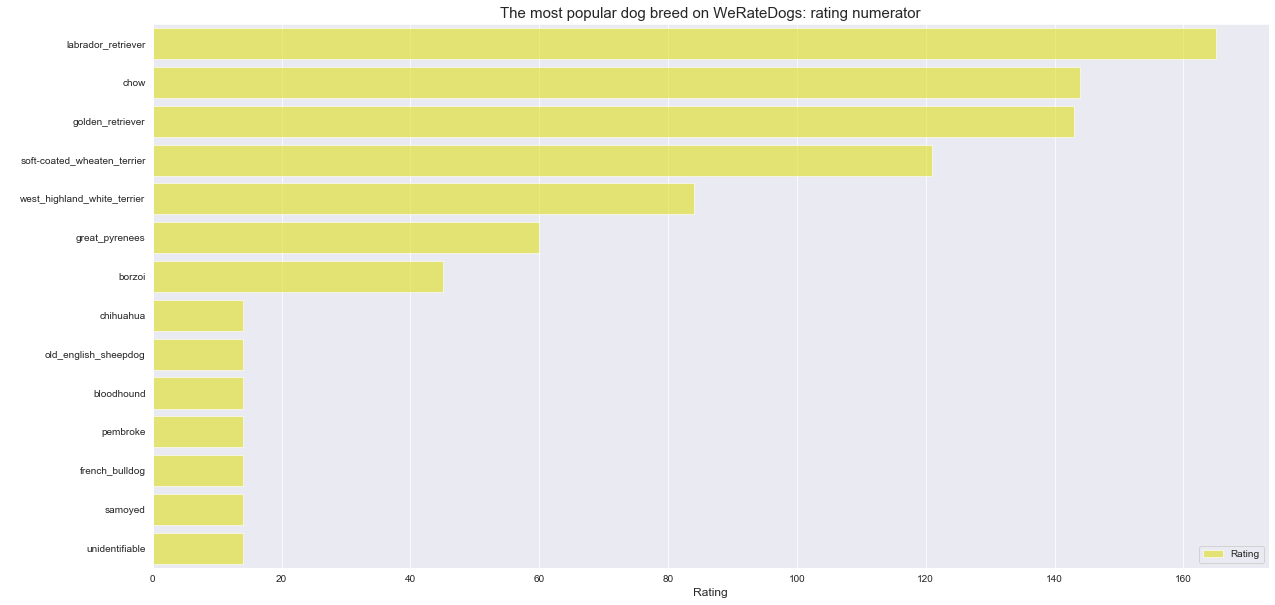

In [175]:
# Setting up the figure
plt.figure(figsize = (20,10))
sns.set_color_codes("dark")

# Plotting
sns.barplot(x = "rating_numerator", y = "prediction", data = df_ratings, color = "yellow", label = "Rating", alpha = 0.6, ci = None, estimator = max)

# Setting up the title and axes label
plt.title("The most popular dog breed on WeRateDogs: rating numerator", fontsize = 15)
plt.xlabel("Rating", fontsize = 12)
plt.ylabel(" ")
plt.legend();
plt.savefig("rating.png", dpi = 400)

### Insight
When the criterion is the rating, labrador retriever is the breed of dog that has the highest grade. This highest-rated  tweet was posted with a single photo and surpassed others tweets with more photos. The labrador retriever is the big winner in popularity on WeRateDogs. The list goes on with chow, golden retriver, soft coated wheaten terrier, (another) golden retriever, etc. No tweets that were present in the previous lists (favorites and retweets) appear here.

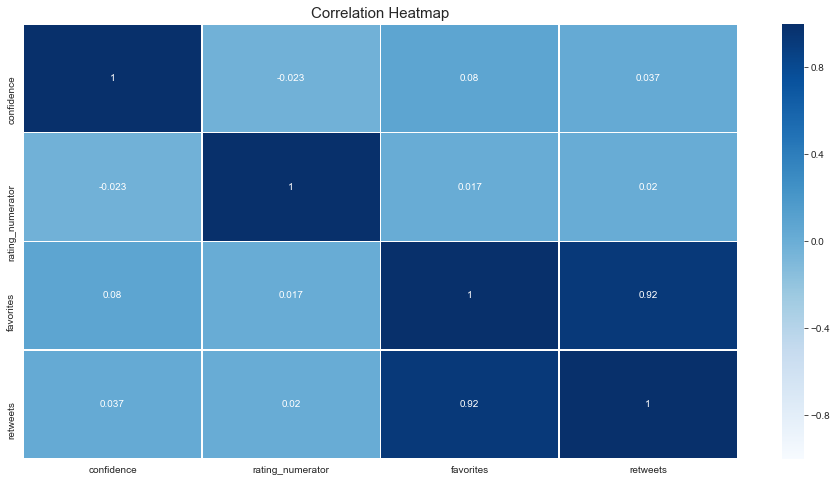

In [176]:
# Setting up the figure
plt.figure(figsize = (16,8))

# Plotting the Heatmap
sns.heatmap(df_twitter[["confidence", "rating_numerator", "favorites", "retweets"]].corr(), annot = True, cmap = "Blues", linewidths = .5, vmin = -1, vmax = 1)

# Setting up the title
plt.title("Correlation Heatmap", fontsize = 15);
plt.savefig("correlation.png", dpi = 400)

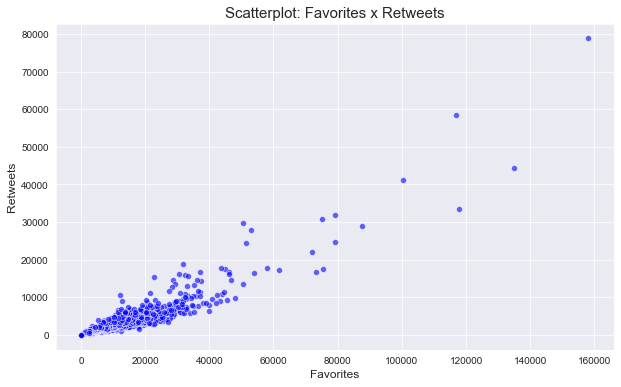

In [177]:
# Setting up the figure
plt.figure(figsize = (10,6))
sns.set_color_codes("dark")

# Plotting
sns.scatterplot(x = "favorites", y = "retweets", data = df_twitter, color = "blue", alpha = 0.6)


# Setting up the title and axes label
plt.title("Scatterplot: Favorites x Retweets", fontsize = 15)
plt.xlabel("Favorites", fontsize = 12)
plt.ylabel("Retweets", fontsize = 12);
plt.savefig("correlation2.png", dpi = 400)

### Insight
Through the heatmap graph we identified that the favorites and retweets variables have the highest positive correlation of the dataframe (0.92). The scatterplot confirms the correlation.

In [178]:
df_twitter.describe()

,tweet_id,rating_numerator,rating_denominator,favorites,retweets,img_num,confidence
count,1.919000e+03,1919.000000,1919.000000,1919.000000,1919.000000,1919.000000,1919.000000
mean,7.348432e+17,12.236467,10.531527,7814.594059,2262.474726,1.202189,0.462841
std,6.765020e+16,42.262691,7.400992,11492.967449,4000.051574,0.559099,0.340278
min,6.660209e+17,0.000000,10.000000,72.000000,11.000000,1.000000,0.000000
25%,6.756206e+17,10.000000,10.000000,1728.000000,542.000000,1.000000,0.132981
50%,7.072973e+17,11.000000,10.000000,3576.000000,1151.000000,1.000000,0.457117
75%,7.859003e+17,12.000000,10.000000,9465.500000,2576.500000,1.000000,0.776373
max,8.924206e+17,1776.000000,170.000000,158154.000000,78786.000000,4.000000,0.999956


C:\Users\Felipe\Anaconda3\lib\site-packages\seaborn\relational.py:792: FutureWarning: Converting timezone-aware DatetimeArray to timezone-naive ndarray with 'datetime64[ns]' dtype. In the future, this will return an ndarray with 'object' dtype where each element is a 'pandas.Timestamp' with the correct 'tz'.
	To accept the future behavior, pass 'dtype=object'.
	To keep the old behavior, pass 'dtype="datetime64[ns]"'.
  x, y = np.asarray(x), np.asarray(y)


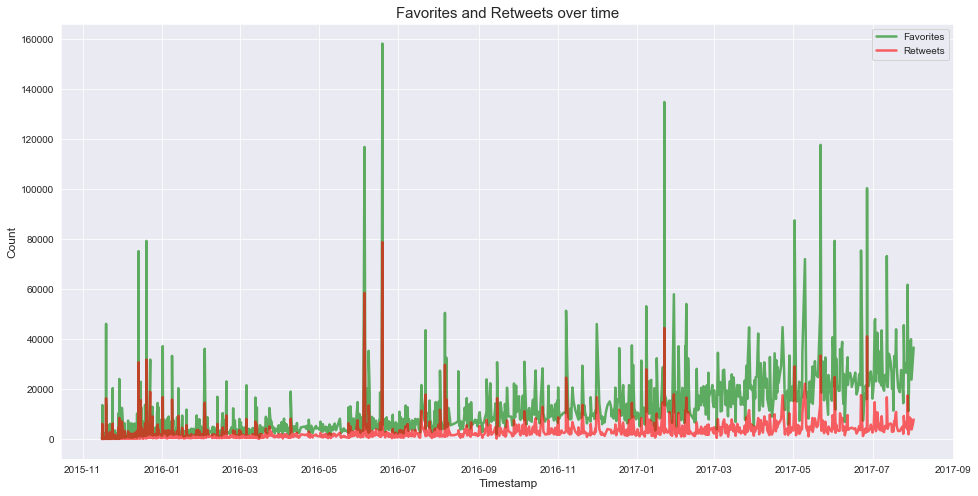

In [179]:
# Setting up the figure
plt.figure(figsize = (16,8))

# Plotting the Line chart
line_chart_fav = sns.lineplot(x = "timestamp", y = "favorites", data = df_twitter, linewidth = 2.5, label = "Favorites", alpha = 0.6, color = "green")
line_chart_ret = sns.lineplot(x = "timestamp", y = "retweets", data = df_twitter, linewidth = 2.5, label = "Retweets", alpha = 0.6, color = "red")

# Setting up the title and axes label
plt.title("Favorites and Retweets over time", fontsize = 15)
plt.xlabel("Timestamp", fontsize = 12)
plt.ylabel("Count", fontsize = 12);
plt.savefig("fav_rt.png", dpi = 400)

We can observe the evolution of favs and RTs over time. As the WeRateDogs account grew and became popular on Twitter, the number of favs and RTs accompanies the organic growth. Favs and RTs have a strong correlation, we can observe that the tweet with the highest number of favs is also the one with the highest number of RTs.

## Conclusion
 - Golden retriever is the most popular dog when we counting the breed of dogs in each tweet on WeRateDog.

 - The labrador retriever is not only the most popular breed of dog in WeRateDogs when counting favorites, it is also the most popular in the number of retweets. The same tweet (744234799360020481) received the highest number of favs and highest number of RTs.

 - When the criterion is the rating, labrador retriever is the breed of dog that has the highest grade. The labrador retriever is the big winner in popularity on WeRateDogs.

 - Through the heatmap graph we identified that the favorites and retweets variables have the highest positive correlation of the dataframe (0.92). The same tweet (744234799360020481) shows the highest number of favs and RTs demonstrates this high correlation.

 - Although Twitter's strength is real-time, one popular tweet remains strong on the social network, attracting favs and RTs over time.